In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [4]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

Requirement already up-to-date: yfinance in c:\users\mathe\anaconda3\lib\site-packages (0.1.54)


In [10]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 8)

In [13]:
tickers = ['^BVSP', 'WEGE3.SA', 'BBAS3.SA']
carteira = web.get_data_yahoo(tickers, start='2018-01-01')['Close']

In [14]:
carteira.columns = ['Ibovespa', 'WEG', 'Banco do Brasil']
carteira

,Ibovespa,WEG,Banco do Brasil
Date,,,
2018-01-02,77891.000000,19.246201,32.930000
2018-01-03,77995.000000,18.953800,33.349998
2018-01-04,78647.000000,18.769199,33.669998
2018-01-05,79071.000000,18.846201,33.669998
2018-01-08,79379.000000,19.000000,33.750000
...,...,...,...
2020-05-29,87403.000000,41.830002,30.840000
2020-06-01,88620.000000,42.160000,31.799999
2020-06-02,91046.000000,42.419998,32.820000


In [32]:
#Performance em relação ao Ibovespa - Normalizando os dados
carteira['ibov_norm'] = (carteira['Ibovespa'] / carteira['Ibovespa'].iloc[0])
carteira['Weg_norm'] = (carteira['WEG'] / carteira['WEG'].iloc[0])
carteira['BB_norm'] = (carteira['Banco do Brasil'] / carteira['Banco do Brasil'].iloc[0])
carteira_norm = carteira.iloc[:,3:]
carteira_norm.columns = ['Ibovespa', 'WEG', 'Banco do Brasil']
carteira_norm

,Ibovespa,WEG,Banco do Brasil
Date,,,
2018-01-02,1.000000,1.000000,1.000000
2018-01-03,1.001335,0.984807,1.012754
2018-01-04,1.009706,0.975216,1.022472
2018-01-05,1.015149,0.979217,1.022472
2018-01-08,1.019104,0.987208,1.024901
...,...,...,...
2020-05-29,1.122119,2.173416,0.936532
2020-06-01,1.137744,2.190562,0.965685
2020-06-02,1.168890,2.204071,0.996660


In [29]:
import seaborn as sns; sns.set()

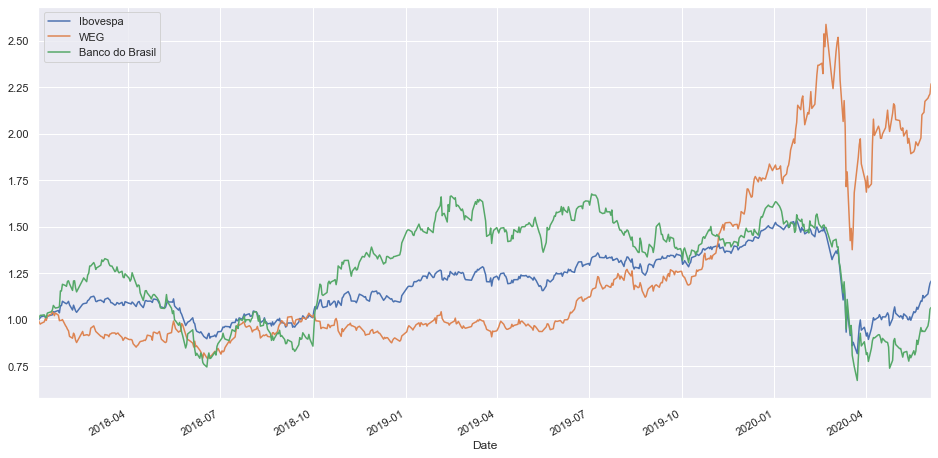

In [33]:
carteira_norm.plot()
plt.legend()

In [35]:
!pip install investpy
import investpy as inv

In [50]:
funds = inv.get_funds_list(country='brazil')
funds

['Fundo De Investimento Multimercado Bordeaux Iv Crédito Privado Investimento No Exterior',
 'Cshg Warrior V Fundo De Investimento Multimercado - Crédito Privado Investimento No Exterior',
 'A3 Viking Fi Em Quotas De Fi Multimercado Crédito Privado Investimento No Exterior',
 'Bb Espelho Multimercado Lp J. Safra Absoluto 30 Private Fic Fi',
 'Ctm Hedge Fundo De Investimento Multimercado - Longo Prazo',
 'Vif - Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado',
 'Fundo De Investimento Multimercado Bordeaux Iii Crédito Privado Investimento No Exterior',
 'Bb Top Tatico Fundo De Investimento Multimercado',
 'Epm Fundo De Investimento Multimercado Crédito Privado Investimento No Exterior',
 'Western Asset Multitrading H Multimercado Fundo De Investimento',
 'Concordia Phoenix Fundo De Investimento Multimercado Crédito Privado',
 'Fundo De Investimento Multimercado Irmb Crédito Privado - Investimento No Exterior',
 'Wm Multigestor Estratégia Fundo De Investimento Em Cot

In [51]:
funds_name = inv.search_funds(by='name', value='Bb Top Tatico Fundo De Investimento Multimercado')
funds_name

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,brazil,Bb Top Tatico Fundo De Investimento Multimercado,0P0000XJZX,BB Gestão de Recursos DTVM SA,BRTTC6CTF005,other,BRL,NaN


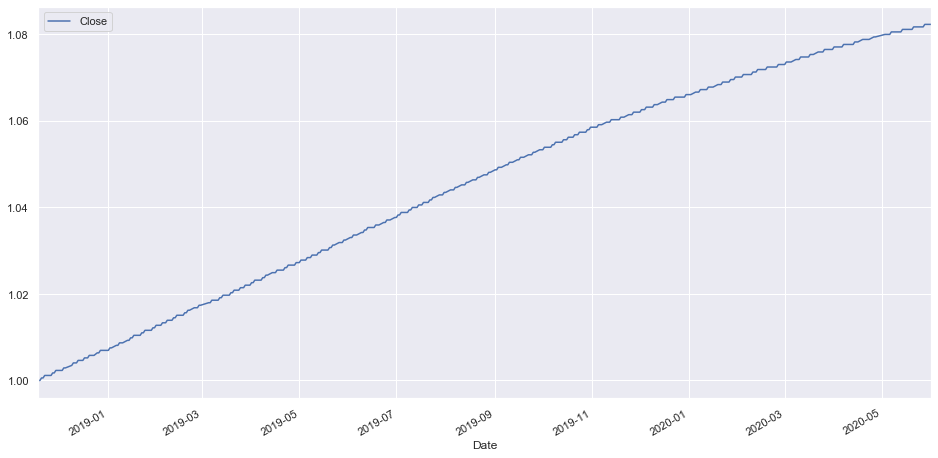

In [68]:
BB_fund = 'Bb Top Tatico Fundo De Investimento Multimercado'
funds_BB_data = inv.get_fund_historical_data(BB_fund, country='brazil', from_date='01/01/2000', to_date='04/06/2020')[['Close']]

In [74]:
indices = inv.get_indices(country='brazil')
indices

,country,name,full_name,symbol,currency,class,market
0,brazil,MSCI Brazil Net USD,MSCI Brazil Net USD,MIBR00000NUS,USD,major_indices,global_indices
1,brazil,DJ Brazil,Dow Jones Brazil,BRDOW,BRL,major_indices,global_indices
2,brazil,TR Brazil 50,Thomson Reuters Brazil 50,TRX50BRP,BRL,additional_indices,global_indices
3,brazil,MSCI Brazil Price USD,MSCI Brazil Price USD,MSCIBR,USD,additional_indices,global_indices
4,brazil,DJ Brazil Titans 20 ADR,Dow Jones Brazil Titans 20 ADR,BR20,USD,additional_indices,global_indices
5,brazil,BNY Mellon Brazil ADR,BNY Mellon Brazil ADR,BKBR,USD,additional_indices,global_indices
6,brazil,BNY Mellon Brazil ADR TR,BNY Mellon Brazil ADR Total Return,BKBRT,USD,additional_indices,global_indices
7,brazil,BNY Mellon Brazil Classic ADR,BNY Mellon Brazil Classic ADR,BKCBR,USD,additional_indices,global_indices
8,brazil,BNY Mellon Brazil Classic ADR TR,BNY Mellon Brazil Classic ADR Total Return,BKCBRT,USD,additional_indices,global_indices
9,brazil,FTSE RAFI Brazil 50,FTSE RAFI Brazil 50,FTFRBR5,BRL,additional_indices,global_indices


In [100]:
#Setor Industrial
pesq_INDX = inv.search_indices(by='name', value='Industrial Sector')
INDX = 'Industrial Sector'
INDX_data = inv.get_index_historical_data(INDX, country='brazil', from_date='01/01/2018', to_date='03/06/2020')[['Close']]
INDX_data_norm = INDX_data / INDX_data.iloc[0]
INDX_data_norm

,Close
Date,
2018-01-01,1.000000
2018-01-02,0.998310
2018-01-03,1.007749
2018-01-04,1.012158
2018-01-07,1.017183
...,...
2020-05-27,1.078724
2020-05-28,1.071775
2020-05-31,1.085695


In [101]:
#Setorn de Energia
IEE = 'Electrical Energy'
IEE_data = inv.get_index_historical_data(IEE, country='brazil', from_date='01/01/2018', to_date='03/06/2020')[['Close']]
IEE_data_norm = IEE_data / IEE_data.iloc[0]
IEE_data_norm

,Close
Date,
2018-01-01,1.000000
2018-01-02,0.992109
2018-01-03,0.982346
2018-01-04,0.985196
2018-01-07,0.987125
...,...
2020-05-27,1.670841
2020-05-28,1.665709
2020-05-31,1.672957


In [102]:
#Setor de Consumo
ICON = 'Consumption'
ICON_data = inv.get_index_historical_data(ICON, country='brazil', from_date='01/01/2018', to_date='03/06/2020')[['Close']]
ICON_data_norm = ICON_data / ICON_data.iloc[0]
ICON_data_norm

,Close
Date,
2018-01-01,1.000000
2018-01-02,0.997669
2018-01-03,1.000678
2018-01-04,1.005477
2018-01-07,0.997287
...,...
2020-05-27,1.134236
2020-05-28,1.127666
2020-05-31,1.145757


In [106]:
#SETOR DE MATERIAIS BÁSICOS
IMAT = 'Basic Materials'
IMAT_data = inv.get_index_historical_data(IMAT, country='brazil', from_date='01/01/2018', to_date='03/06/2020')[['Close']]
IMAT_data_norm = IMAT_data / IMAT_data.iloc[0]
IMAT_data_norm

,Close
Date,
2018-01-01,1.000000
2018-01-02,0.998385
2018-01-03,1.018285
2018-01-04,1.023352
2018-01-07,1.044962
...,...
2020-05-27,1.234824
2020-05-28,1.251831
2020-05-31,1.263934


In [103]:
#IBOVESPA
BVSP = 'Bovespa'
BVSP_data = inv.get_index_historical_data(BVSP, country='brazil', from_date='01/01/2018', to_date='03/06/2020')[['Close']]
BVSP_data_norm = BVSP_data / BVSP_data.iloc[0]
BVSP_data_norm

,Close
Date,
2018-01-01,1.000000
2018-01-02,1.001337
2018-01-03,1.009711
2018-01-04,1.015155
2018-01-07,1.019097
...,...
2020-05-27,1.116291
2020-05-28,1.122114
2020-05-31,1.137744


In [104]:
#SETOR FINANCEIRO
IFNC = 'Financials'
IFNC_data = inv.get_index_historical_data(IFNC, country='brazil', from_date='01/01/2018', to_date='03/06/2020')[['Close']]
IFNC_data_norm = IFNC_data / IFNC_data.iloc[0]
IFNC_data_norm

,Close
Date,
2018-01-01,1.000000
2018-01-02,1.009127
2018-01-03,1.021794
2018-01-04,1.027821
2018-01-07,1.029659
...,...
2020-05-27,1.078547
2020-05-28,1.072573
2020-05-31,1.097267


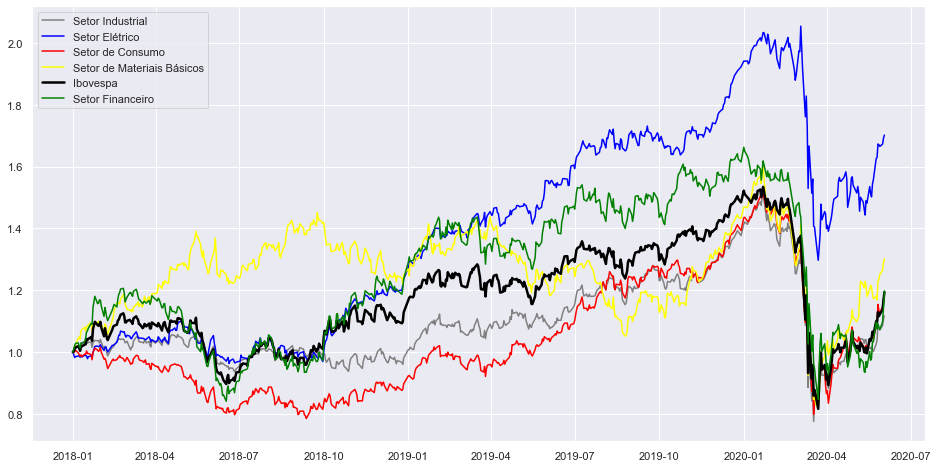

In [107]:
fig, ax = plt.subplots()
ax.plot(INDX_data_norm, label= 'Setor Industrial', linewidth=1.5, color='gray')
ax.plot(IEE_data_norm, label = 'Setor Elétrico', linewidth=1.5, color='blue')
ax.plot(ICON_data_norm, label = 'Setor de Consumo', linewidth=1.5, color='red')
ax.plot(IMAT_data_norm, label = 'Setor de Materiais Básicos',linewidth=1.5, color='yellow')
ax.plot(BVSP_data_norm, label = 'Ibovespa', linewidth=2.5, color='black')
ax.plot(IFNC_data_norm, label = 'Setor Financeiro', linewidth=1.5, color='green')
plt.legend()